$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\cset}[1]{\mathcal{#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\ip}[3]{\left<#1,#2\right>_{#3}}
\newcommand{\given}[]{\,\middle\vert\,}
\newcommand{\DKL}[2]{\cset{D}_{\text{KL}}\left(#1\,\Vert\, #2\right)}
\newcommand{\grad}[]{\nabla}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
$$

# Part 3: Summary Questions
<a id=part2></a>

This section contains summary questions about various topics from the course material.

You can add your answers in new cells below the questions.

**Notes**

- Clearly mark where your answer begins, e.g. write "**Answer:**" in the beginning of your cell.
- Provide a full explanation, even if the question doesn't explicitly state so. We will reduce points for partial explanations!
- This notebook should be runnable from start to end without any errors.

### CNNs

1. Explain the meaning of the term "receptive field" in the context of CNNs.

**Answer:**<br>
The term "Receptive Field", in the context of CNNs, refers to the region in the input on which the convolutional network performs some calculation and produces (outputs) the feature.

2. Explain and elaborate about three different ways to control the rate at which the receptive field grows from layer to layer. Compare them to each other in terms of how they combine input features.

**Answer:**<br>

- A popular way to control the rate at which the receptive field grows from layer to layer is the **Kernel size**.<br>
The Kernel size controls the rate at which the receptive field grows from layer to layer such that by increasing it we take more input features, or more pixels of an image, for example (and by decreasing it we take less) which affects the output result.


- The **Stride** is a parameter of the neural network's filter that modifies the amount of movement over the image or video.<br>
For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit, at a time.
Naturally, as the stride, or movement, is increased, the resulting output will be smaller.


- **Dilated Convolution**: A technique that expands the kernel size (input size) by inserting holes (or "skips"/"gaps") between its consecutive elements.<br>
In simpler terms, it is same as convolution but it involves pixel skipping, so as to cover a larger area of the input.<br>
An additional parameter l (dilation factor) tells how much the input is expanded.<br>
In other words, based on the value of this parameter, (l-1) pixels are skipped in the kernel.<br>
Fig 1 depicts the difference between normal vs dilated convolution.<br>
In essence, normal convolution is just 1-dilated convolution.

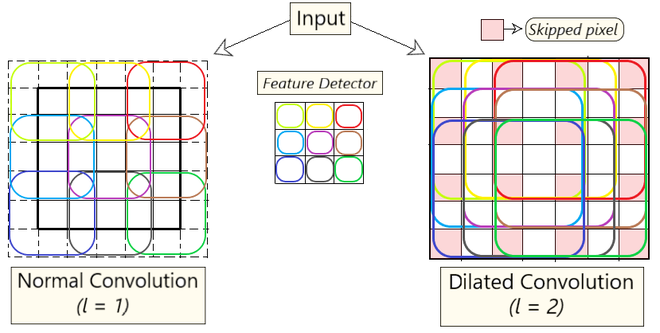

[*](https://www.geeksforgeeks.org/dilated-convolution)

3. Imagine a CNN with three convolutional layers, defined as follows:

In [ ]:
import torch
import torch.nn as nn

cnn = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=4, out_channels=16, kernel_size=5, stride=2, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=7, dilation=2, padding=3),
    nn.ReLU(),
)

cnn(torch.rand(size=(1, 3, 1024, 1024), dtype=torch.float32)).shape

What is the size (spatial extent) of the receptive field of each "pixel" in the output tensor?

**Answer:**<br>
We can calculate the size (spatial extent) of the receptive field of each "pixel" in the output tensor using the formula:<br>
$$
r_{0}=\sum_{l=1}^{L}\left(\left(k_{l}-1\right) \prod_{i=1}^{l-1} s_{i}\right)+1
$$
* Where k is the kernel size and s is the stride from the previous question.<br>
* Activation functions do not affect the size.
* MaxPool2d(2) is like peforming a Conv2d with k==2 (input argument) and s==2 ([default](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)).
* Dilation of 2 with a kernel of 7 is a kernel of 13 (like in the figure in previous question) --> (7 * 2) - 1 = 13

So:<br>
`nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, padding=1)` --> (3 - 1) * 1 = 2<br>
`nn.MaxPool2d(2)` --> (2 - 1) * 2 = 2<br>
`nn.Conv2d(in_channels=4, out_channels=16, kernel_size=5, stride=2, padding=2)` --> (5 - 1) * 2 = 8<br>
`nn.MaxPool2d(2)` --> (2 - 1) * 2 = 2<br>
`nn.Conv2d(in_channels=16, out_channels=32, kernel_size=7, dilation=2, padding=3)` --> (13 - 1) * 2 = 24<br>


Summing all and adding the last `+ 1` from the formula give a size of:<br>
(2 + 2 + 8 + 2 + 24) + 1 = 39

[*](https://www.baeldung.com/cs/cnn-receptive-field-size)

4. You have trained a CNN, where each layer $l$ is represented by the mapping $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)$, and $f_l(\cdot;\vec{\theta}_l)$ is a convolutional layer (not including the activation function).

  After hearing that residual networks can be made much deeper, you decide to change each layer in your network you used the following residual mapping instead $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)+\vec{x}$, and re-train.

  However, to your surprise, by visualizing the learned filters $\vec{\theta}_l$ you observe that the original network and the residual network produce completely different filters. Explain the reason for this.

**Answer:**<br>


---

### Dropout

1. Consider the following neural network:

In [4]:
import torch.nn as nn

p1, p2 = 0.1, 0.2
nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Dropout(p=p1),
    nn.Dropout(p=p2),
)

Sequential(
  (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Dropout(p=0.2, inplace=False)
)

If we want to replace the two consecutive dropout layers with a single one defined as follows:
```python
nn.Dropout(p=q)
```
what would the value of `q` need to be? Write an expression for `q` in terms of `p1` and `p2`.

**Answer:**<br>
q = 1 - (1-p1)*(1-p2) = 1 - 0.9 * 0.8 = 1 - 0.72 = 0.28

2. **True or false**: dropout must be placed only after the activation function.

**Answer:**<br>
**False**<br>
Typically, dropout is applied after the non-linear activation function (a).<br>
However, when using rectified linear units (ReLUs), it might make sense to apply dropout before the non-linear activation (b) for reasons of computational efficiency (to avoid unnecessary computaions) depending on the particular code implementation.

(a): Fully connected, linear activation -> ReLU -> Dropout -> …<br>
(b): Fully connected, linear activation -> Dropout -> ReLU -> …


There's some debate as to whether the dropout should be placed before or after the activation function.<br>
As a rule of thumb, place the dropout after the activate function for all activation functions other than relu.


[*](https://sebastianraschka.com/faq/docs/dropout-activation.html)

3. After applying dropout with a drop-probability of $p$, the activations are scaled by $1/(1-p)$. Prove that this scaling is required in order to maintain the value of each activation unchanged in expectation.

**Answer:**<br>
By not scaling, the expected output is (1 - p) * x<br>
With scaling we'll get:<br>
$$
\frac{1}{1-p} \cdot \mathbb{E}[\mathrm{D}]=\frac{1}{1-p}(p \cdot 0+(1-p) * x)=\frac{1-p}{1-p} \cdot x=x
$$

---

### Losses and Activation functions

1. You're training a an image classifier that, given an image, needs to classify it as either a dog (output 0) or a hotdog (output 1). Would you train this model with an L2 loss? if so, why? if not, demonstrate with a numerical example. What would you use instead?

**Answer:**<br>
L2 loss is used mostly in regression problems and therefore, we would <u>NOT</u> use it.<br>
Since we don't want to know how similar the classes are, and we only want to classify the images, we would use Binary Cross Entropy instead.<br>
Example:<br>
If we use L2 loss and get probabilities of 0.49 & 0.51 on 2 dog samples, we will calssify each as differently, although they are both dogs.<br>
BCE will give us more infomation.

2. After months of research into the origins of climate change, you observe the following result:

<center><img src="https://sparrowism.soc.srcf.net/home/piratesarecool4.gif" /></center>

You decide to train a cutting-edge deep neural network regression model, that will predict the global temperature based on the population of pirates in `N` locations around the globe.
You define your model as follows:

In [6]:
import torch.nn as nn

N = 42  # number of known global pirate hot spots
H = 128
mlpirate = nn.Sequential(
    nn.Linear(in_features=N, out_features=H),
    nn.Sigmoid(),
    *[
        nn.Linear(in_features=H, out_features=H), nn.Sigmoid(),
    ]*24,
    nn.Linear(in_features=H, out_features=1),
)

While training your model you notice that the loss reaches a plateau after only a few iterations.
It seems that your model is no longer training.
What is the most likely cause?

**Answer:**<br>
Whenever the loss reaches a plateau after only a few iterations on training, it is probably caused by vanishing gradients.<br>
Multiplications of a lot of derivatives (chain rule) might cause explodig gradinent or vanshing gradient.

3. Referring to question 2 above: A friend suggests that if you replace the `sigmoid` activations with `tanh`, it will solve your problem. Is he correct? Explain why or why not.

**Answer:**<br>
The friend is wrong.<br>
Both sigmoid and tanh derviatives converge to 0 at +-infinty and are bounded around 0.<br>
Therefore, we get the same results.

<img src="https://qph.cf2.quoracdn.net/main-qimg-f1baf29cfdb09202b18e2179f4f41bfc" />
<img src="https://i.stack.imgur.com/inMoa.png" />

4. Regarding the ReLU activation, state whether the following sentences are **true or false** and explain:
  1. In a model using exclusively ReLU activations, there can be no vanishing gradients.
  1. The gradient of ReLU is linear with its input when the input is positive.
  1. ReLU can cause "dead" neurons, i.e. activations that remain at a constant value of zero.

**Answer:**<br>
A. **False**. ReLU activations can have vanishing gradients as well.<br>
If the output of a filter set in a layer, using ReLU activation, is always negative, the gradient will always vanish.<br>
Before Batch Normalization technique, the assumption was that such a case is unlikely to happen.<br>
[*](https://www.quora.com/Can-ReLU-definitely-avoid-the-vanishing-gradient-problem-even-in-a-very-deep-neural-network)

B. **False**. The gradient of ReLU is <u>constant</u> (== 1) for a positive input.<br>

C. **True**. Non-positive inputs will results in continuous 0 gradients and "dead" neurons along the network.

---

### Optimization

1. Explain the difference between: stochastic gradient descent (SGD), mini-batch SGD and regular gradient descent (GD).

**Answer:**<br>
- GD:<br>
Update the weights only after calculating the mean loss of <u>all</u> the samples. Hence in such situation it will become very costly operation and it will converge very slowly.


- SGD:<br>
Update the weights with every sample and converge very fast.


- Mini-batch SGD:<br>
Select only a batch of the samples and perform SGD on them.


[*](https://datascience.stackexchange.com/questions/53870/how-do-gd-batch-gd-sgd-and-mini-batch-sgd-differ)

2. Regarding SGD and GD:
  1. Provide at least two reasons for why SGD is used more often in practice compared to GD.
  2. In what cases can GD not be used at all?

**Answer:**<br>
A.<br>
1. SGD converges to a minimum faster (usually data is big, and GD is not practical).<br>
2. Memory allocation (GD may take too much space).<br>


B. GD is not used at all when the dataset is very large.<br>
Storing all samples in memory is not practical.

3. You have trained a deep resnet to obtain SoTA results on ImageNet.
While training using mini-batch SGD with a batch size of $B$, you noticed that your model converged to a loss value of $l_0$ within $n$ iterations (batches across all epochs) on average.
Thanks to your amazing results, you secure funding for a new high-powered server with GPUs containing twice the amount of RAM.
You're now considering to increase the mini-batch size from $B$ to $2B$.
Would you expect the number of of iterations required to converge to $l_0$ to decrease or increase when using the new batch size? explain in detail.

**Answer:**<br>
We expect that iterations-wise, we'll have less this time, due to the fact that using a larger batch size (2B) we'll have better calculations (gradient's update rule results) toward finding a minimum.

4. For each of the following statements, state whether they're **true or false** and explain why.
  1. When training a neural network with SGD, every epoch we perform an optimization step for each sample in our dataset.
  1. Gradients obtained with SGD have less variance and lead to quicker convergence compared to GD.
  1. SGD is less likely to get stuck in local minima, compared to GD.
  1. Training  with SGD requires more memory than with GD.
  1. Assuming appropriate learning rates, SGD is guaranteed to converge to a local minimum, while GD is guaranteed to converge to the global minimum.
  1. Given a loss surface with a narrow ravine (high curvature in one direction): SGD with momentum will converge more quickly than Newton's method which doesn't have momentum.

**Answer:**<br>
A. **True**. As described in q1, SGD is considering all samples in our dataset, and update the weights according to every one of them during the process.<br>
It calcluates the gradients for each sample and updates the weights according to the current sample every time, as opposed to GD where we update the weights according to all samples at once.

B. **False**. As described in q1, in SGD the weights are updated on every sample.<br>
This yields more variance in the gradients, compared to GD.

C. **True**. Due to the randomness of SGD (considering a different sample in every step), we may escape local minima as opposed to the deterministic GD.

D. **False**. SGD keeps in memory a single sample on every step, and it fits the weights accordingly.<br>
GD, as opposed to SGD, needs to store all samples in memory before updating the weights.

E. **False**. GD may also not converge to the global minimum, and as described in section C, SGD may get a better solution (still not global minimum necessarily).

F. **False**. As in every other compariosn - it depends on the input. Some may lead to a better solution in one approach and vice versa...

5. **Bonus** (we didn't discuss this at class):  We can use bi-level optimization in the context of deep learning, by embedding an optimization problem as a layer in the network.
  **True or false**: In order to train such a network, the inner optimization problem must be solved with a descent based method (such as SGD, LBFGS, etc).
  Provide a mathematical justification for your answer.

**Answer:**<br>
**False**.

6. You have trained a neural network, where each layer $l$ is represented by the mapping $\vec{y}_l=f_l(\vec{x};\vec{\theta}_l)$ for some arbitrary parametrized functions $f_l(\cdot;\vec{\theta}_l)$.
  Unfortunately while trying to break the record for the world's deepest network, you discover that you are unable to train your network with more than $L$ layers.
  1. Explain the concepts of "vanishing gradients", and "exploding gradients".
  2. How can each of these problems be caused by increased depth?
  3. Provide a numerical example demonstrating each.
  4. Assuming your problem is either of these, how can you tell which of them it is without looking at the gradient tensor(s)?

**Answer:**<br>
A.<br>
<u>Vanishing gradients</u>:<br>
Neural networks suffer from the problem of vanishing gradients which is where the gradients of the weights become smaller and smaller and eventually become zero as we backpropagate from the last time-step towards the first time-step.

<u>Exploding gradients</u>:<br>
In some cases, the gradients keep on getting larger and larger as the backpropagation algorithm progresses. This causes very large weight updates and causes the gradient descent to diverge.

<img src="https://miro.medium.com/max/1400/1*_YRWJr-jF7tKnmUq-e3ltw.png" />

B. According to the chain rule, as layers increase, the derivation result decreases, resulting in the vanishing gradient problem.<br>
On the contratry, when the network weight is large, resulting in increaing derivation result, the exploding gradient problem occurs.

C. 
Suppose you have a very deep network with several dozens of layers. Each layer multiplies the input x with a weight w and sends the result through an activation function.<br>
(For the sake of simplicity, we will ignore the bias term b).

$$a_1 = \sigma(w_1x) \rightarrow a_2 = \sigma(w_2a_1) \rightarrow a_3 = \sigma(w_3a_2)$$

Further, suppose the activation function just passes through the term without performing any non-linear transformations.<br>
Essentially, every layer in the neural network just multiplies another weight to the current term.

<u>Vanishing gradients</u>:<br>
<img src="https://programmathically.com/wp-content/uploads/2021/10/Screenshot-2021-10-29-at-15.21.19-1024x189.png" />

Assume the weights are all equal to 0.6. This means with every additional layer we multiply the weight by itself.
<img src="https://programmathically.com/wp-content/uploads/2021/10/Screenshot-2021-10-29-at-15.36.42-1024x236.png" />

By the time you get to the third layer, you need to take the weight to the power of 3.<br>
w^3 = 0.6^3 = 0.21

Now assume you have a network with 15 layers. Now your third weight equals w to the power of 15.<br>
w^15 = 0.6^15 = 0.00047

As you can see, the weight is now vanishingly small, and it further shrinks exponentially with every additional layer.

<u>Exploding gradients</u>:<br>
The reverse is true if your initial weight is larger than 1, let’s say 1.6.<br>
w^15 = 1.6^15 = 281.47

This is an example of exploding gradients.

D. 
<u>Vanishing gradients</u>:<br>
The model learns very slowly and perhaps the training stagnates at a very early stage just after a few iterations.

Accuracy plot example:<br>
<img src="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Train-and-Test-Set-Accuracy-of-Over-Training-Epochs-for-Deep-MLP-with-ReLU-in-the-Two-Circles-Problem.png" />

<u>Exploding gradients</u>:<br>
For exploding gradients we notice very unstable values ("avalanched" graph).

---

### Backpropagation

1. You wish to train the following 2-layer MLP for a binary classification task:
  $$
  \hat{y}^{(i)} =\mat{W}_2~ \varphi(\mat{W}_1 \vec{x}^{(i)}+ \vec{b}_1) + \vec{b}_2
  $$
  Your wish to minimize the in-sample loss function is defined as
  $$
  L_{\mathcal{S}} = \frac{1}{N}\sum_{i=1}^{N}\ell(y^{(i)},\hat{y}^{(i)}) + \frac{\lambda}{2}\left(\norm{\mat{W}_1}_F^2 + \norm{\mat{W}_2}_F^2 \right)
  $$
  Where the pointwise loss is binary cross-entropy:
  $$
  \ell(y, \hat{y}) =  - y \log(\hat{y}) - (1-y) \log(1-\hat{y})
  $$
  
  Write an analytic expression for the derivative of the final loss $L_{\mathcal{S}}$ w.r.t. each of the following tensors: $\mat{W}_1$, $\mat{W}_2$, $\mat{b}_1$, $\mat{b}_2$, $\mat{x}$.

**Answer:**<br>


2. The derivative of a function $f(\vec{x})$ at a point $\vec{x}_0$ is
  $$
  f'(\vec{x}_0)=\lim_{\Delta\vec{x}\to 0} \frac{f(\vec{x}_0+\Delta\vec{x})-f(\vec{x}_0)}{\Delta\vec{x}}
  $$
  
  1. Explain how this formula can be used in order to compute gradients of neural network parameters numerically, without automatic differentiation (AD).
  
  2. What are the drawbacks of this approach? List at least two drawbacks compared to AD.

**Answer:**<br>


3. Given the following code snippet:
  1. Write a short snippet that implements that calculates gradient of `loss` w.r.t. `W` and `b` using the approach of numerical gradients from the previous question.
  2. Calculate the same derivatives with autograd.
  3. Show, by calling `torch.allclose()` that your numerical gradient is close to autograd's gradient.

In [4]:
import torch

N, d = 100, 5
dtype = torch.float64
X = torch.rand(N, d, dtype=dtype)
W, b = torch.rand(d, d, requires_grad=True, dtype=dtype), torch.rand(d, requires_grad=True, dtype=dtype)

def foo(W, b):
    return torch.mean(X @ W + b)

loss = foo(W, b)
print(f"{loss=}")

# TODO: Calculate gradients numerically for W and b
# grad_W =...
# grad_b =...

# TODO: Compare with autograd using torch.allclose()
# autograd_W = ...
# autograd_b = ...
# assert torch.allclose(grad_W, autograd_W)
# assert torch.allclose(grad_b, autograd_b)

loss=tensor(1.9033, dtype=torch.float64, grad_fn=<MeanBackward0>)


**Answer:**<br>


---

### Sequence models

1. Regarding word embeddings:
  1. Explain this term and why it's used in the context of a language model.
  1. Can a language model like the sentiment analysis example from the tutorials be trained without an embedding (i.e. trained directly on sequences of tokens)? If yes, what would be the consequence for the trained model? if no, why not?

**Answer:**<br>
A. Basically, they are vector representations of words which are capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.<br>


B. A language model like the sentiment analysis example from the tutorials can be trained without an embedding (i.e. trained directly on sequences of tokens) but will probably have poor results.

We can still have a 1-hot vector representations of words, but we will lose the capabilities described in section A

2. Considering the following snippet, explain:
  1. What does `Y` contain? why this output shape?
  2. **Bonus**: How you would implement `nn.Embedding` yourself using only torch tensors. 

In [5]:
import torch.nn as nn

X = torch.randint(low=0, high=42, size=(5, 6, 7, 8))
embedding = nn.Embedding(num_embeddings=42, embedding_dim=42000)
Y = embedding(X)
print(f"{Y.shape=}")

Y.shape=torch.Size([5, 6, 7, 8, 42000])


**Answer:**<br>
A. Y is simple lookup table that stores embeddings of X.<br>
It stores word embeddings from X's words and retrieve them using indices.

B. `nn.linear(42, 42000)` would do it.

3. Regarding truncated backpropagation through time (TBPTT) with a sequence length of S: State whether the following sentences are **true or false**, and explain.
  1. TBPTT uses a modified version of the backpropagation algorithm.
  2. To implement TBPTT we only need to limit the length of the sequence provided to the model to length S.
  3. TBPTT allows the model to learn relations between input that are at most S timesteps apart.

**Answer:**<br>
A. **True**. TBPTT simply refers to at which point in time to stop calculating the gradients for the backpropagation phase.<br>
Instead of propagating to the beginning of the sequence you only propagate backwards k steps.

"It processes the sequence one timestep at a time, and every k1 timesteps, it runs BPTT for k2 timesteps, so a parameter update can be cheap if k2 is small. Consequently, its hidden states have been exposed to many timesteps and so may contain useful information about the far past, which would be opportunistically exploited." - Ilya Sutskever, Training Recurrent Neural Networks, Thesis, 2013

B. **False**.

C. **True**. 

---

### Attention

1. In tutorial 5 we learned how to use attention to perform alignment between a source and target sequence in machine translation.
  1. Explain qualitatively what the addition of the attention mechanism between the encoder and decoder does to the hidden states that the encoder and decoder each learn to generate (for their language). How are these hidden states different from the model without attention?
  
  2. After learning that self-attention is gaining popularity thanks to the transformer models, you decide to change the model from the tutorial: instead of the queries being equal to the decoder hidden states, you use self-attention, so that the keys, queries and values are all equal to the encoder's hidden states (with learned projections, like in the tutorial..). What influence do you expect this will have on the learned hidden states?


**Answer:**<br>


---

### Unsupervised learning

1. As we have seen, a variational autoencoder's loss is comprised of a reconstruction term and  a KL-divergence term. While training your VAE, you accidentally forgot to include the KL-divergence term.
What would be the qualitative effect of this on:

  1. Images reconstructed by the model during training ($x\to z \to x'$)?
  1. Images generated by the model ($z \to x'$)?

**Answer:**<br>


2. Regarding VAEs, state whether each of the following statements is **true or false**, and explain:
  1. The latent-space distribution generated by the model for a specific input image is $\mathcal{N}(\vec{0},\vec{I})$.
  2. If we feed the same image to the encoder multiple times, then decode each result, we'll get the same reconstruction.
  3. Since the real VAE loss term is intractable, what we actually minimize instead is it's upper bound, in the hope that the bound is tight.

**Answer:**<br>


3. Regarding GANs, state whether each of the following statements is **true or false**, and explain:
  1. Ideally, we want the generator's loss to be low, and the discriminator's loss to be high so that it's fooled well by the generator.
  2. It's crucial to backpropagate into the generator when training the discriminator.
  3. To generate a new image, we can sample a latent-space vector from $\mathcal{N}(\vec{0},\vec{I})$.
  4. It can be beneficial for training the generator if the discriminator is trained for a few epochs first, so that it's output isn't arbitrary.
  5. If the generator is generating plausible images and the discriminator reaches a stable state where it has 50% accuracy (for both image types), training the generator more will further improve the generated images.

**Answer:**<br>


---

### Detection and Segmentation 

1. What is the diffrence between IoU and Dice score? what's the diffrance between IoU and mAP?
    shortly explain when would you use what evaluation?

**Answer:**<br>


2. regarding of YOLO and mask-r-CNN, witch one is one stage detector? describe the RPN outputs and the YOLO output, adress how the network produce the output and the shapes of each output.

**Answer:**<br>
